In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import access_br_dwgd as access_br_dwgd
from statsmodels.tsa.stattools import adfuller
import sys,os
sys.path.append(os.path.abspath(".."))

from utils.logger import Logger
logger = Logger.configurar_logger(nome_arquivo="arimaBrDwgd.log", nome_classe="Arima BrDwgd")
logger.info("Iniciando script de previsão com Arima BrDwgd.")

2025-09-29 21:59:40,385 - Arima BrDwgd - INFO - Iniciando script de previsão com Arima BrDwgd.


2025-09-29 21:59:46,589 - Arima BrDwgd - INFO - Dados carregados com sucesso. Total de 5125 registros.
2025-09-29 21:59:46,592 - Arima BrDwgd - INFO - Dados divididos em treino (3587 registros) e teste (1538 registros).


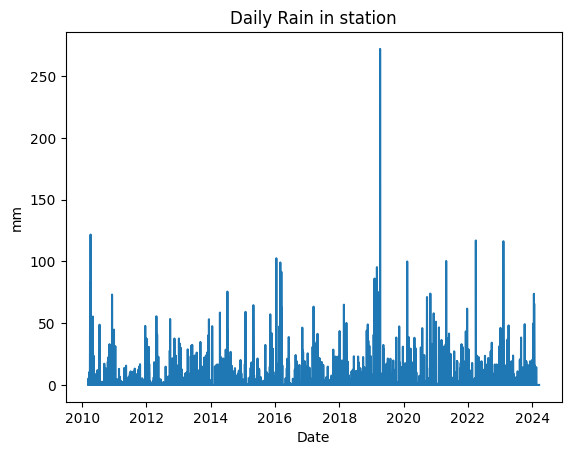

In [2]:
timeseries = access_br_dwgd.recuperar_dados_br_dwgd_com_area()
logger.info(f"Dados carregados com sucesso. Total de {len(timeseries)} registros.")
train_size = int(len(timeseries) * 0.70)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
logger.info(f"Dados divididos em treino ({len(train)} registros) e teste ({len(test)} registros).")

plt.plot(timeseries)
plt.title('Daily Rain in station')
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()


In [3]:
logger.info("Executando teste Augmented Dickey-Fuller (ADF) para estacionariedade.")
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
logger.info(f"Resultado do ADF - p-valor: {adfuller(timeseries, autolag='AIC')[1]}. A série parece ser estacionária.")

2025-09-29 21:59:46,744 - Arima BrDwgd - INFO - Executando teste Augmented Dickey-Fuller (ADF) para estacionariedade.
2025-09-29 21:59:46,918 - Arima BrDwgd - INFO - Resultado do ADF - p-valor: 0.0. A série parece ser estacionária.


2025-09-29 21:59:46,928 - Arima BrDwgd - INFO - Gerando gráficos ACF e PACF para análise de lags.


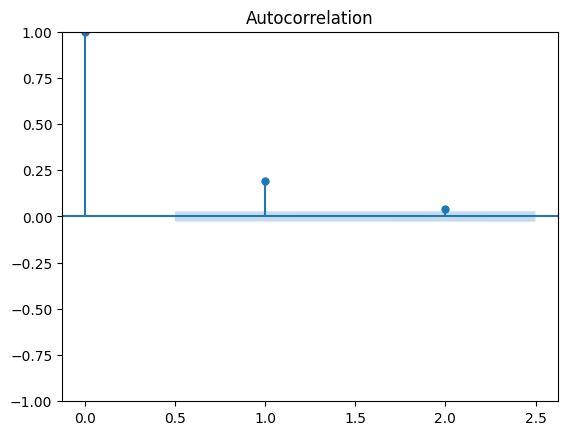

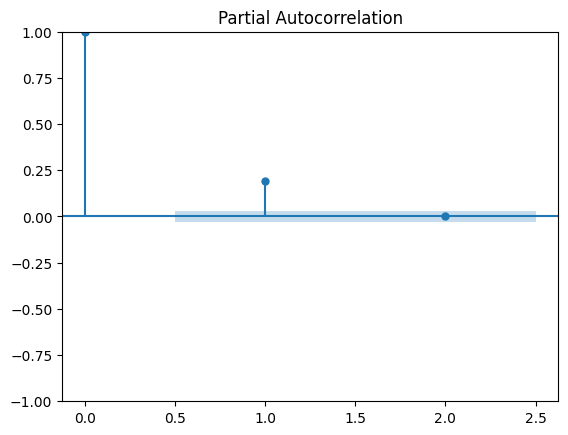

In [4]:
logger.info("Gerando gráficos ACF e PACF para análise de lags.")
plot_acf(timeseries, lags=2)
plot_pacf(timeseries, lags=2)
plt.show()

In [5]:
#ARIMA AUTO
p, d, q = 2, 1 , 1
logger.info(f"Treinando o modelo ARIMA com ordem ( {p} , {d} , {q})")
model = ARIMA(train, order=(p, d, q))
model = model.fit()
test_forecast = model.forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.values, index=test.index)


# RMSE
rmse = sqrt(mean_squared_error(test, test_forecast))
print('RMSE:', rmse)

# MSE
mse = mean_squared_error(test, test_forecast)
print('MSE:', mse)

# MAE
mae = mean_absolute_error(test, test_forecast)
print('MAE:', mae)
logger.info(f"Avaliação do Modelo - RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")


2025-09-29 21:59:47,125 - Arima BrDwgd - INFO - Treinando o modelo ARIMA com ordem ( 2 , 1 , 1)
2025-09-29 21:59:47,660 - Arima BrDwgd - INFO - Avaliação do Modelo - RMSE: 9.7216, MSE: 94.5100, MAE: 4.6819


RMSE: 9.721625138806843
MSE: 94.50999533948116
MAE: 4.681912114254744


2025-09-29 21:59:47,667 - Arima BrDwgd - INFO - Gerando gráfico de avaliação final do modelo ARIMA.


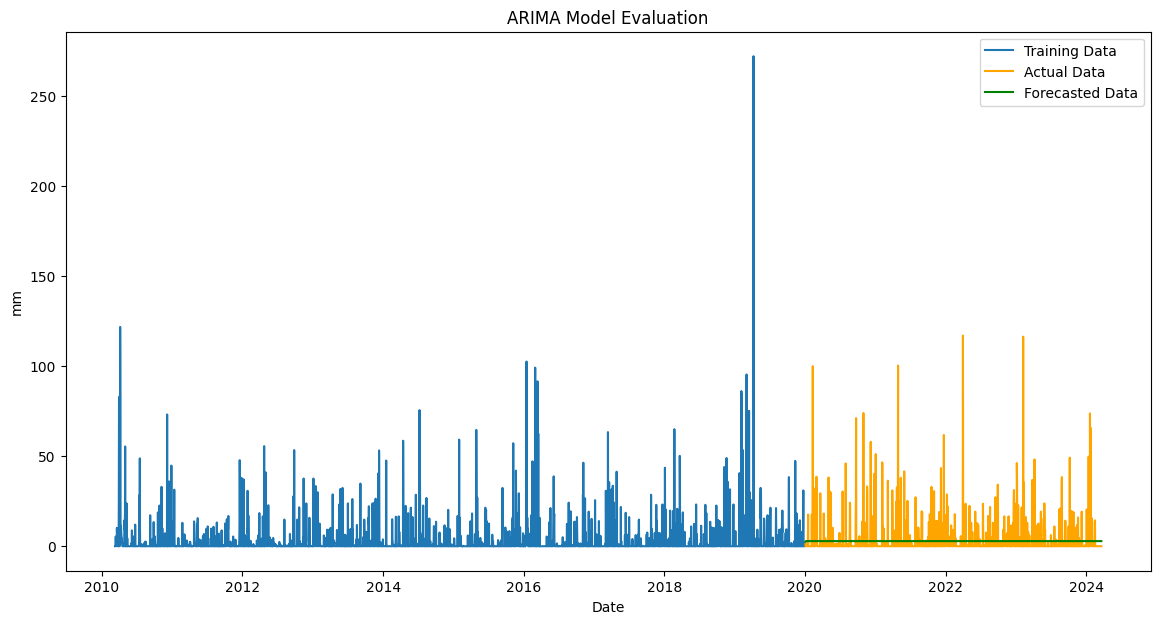

2025-09-29 21:59:47,798 - Arima BrDwgd - INFO - Execução do script ARIMA BrDwgd finalizada.


In [6]:
logger.info("Gerando gráfico de avaliação final do modelo ARIMA.")
# Plot
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')

plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.legend()
plt.show()
logger.info("Execução do script ARIMA BrDwgd finalizada.")
